In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle

# Preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hyperparametrization
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("cardio_train.csv", sep= ";")

In [4]:
df_clean = df.copy()

# 1- EDA

In [5]:
df_clean.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


All of the dataset values were collected at the moment of medical examination. <br>

Data description:<br>

There are 3 types of input features:
- 1- Objective Features (factual information):
    - age: Age of the pacient(days) | int
    - height: Height of the pacient(cm) | int
    - weight: Weight of the pacient(kg) | float
    - gender: Gender of the pacient | boolean
    
    
- 2- Examination Feature(results of medical examination):
    - ap_hi: Systolic blood pressure(mm Hg) | int
    - ap_lo: Diastolic blood pressure(mm Hg) | int
    - cholesterol: Cholesterol | categorical | 1: normal, 2: above normal, 3: well above normal
    - gluc: Glucose | categorical | 1: normal, 2: above normal, 3: well above normal

- 3- Subjective Feature(information given by the patient):
    - smoke: Smoking pacient | boolean
    - alco: Alcohol intake pacient | boolean
    - active: Physical activity | boolean

Target variable:
- cardio: Presence or absence of cardiovascular disease | boolean


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df_clean.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### *!!¡¡ We can observe negative values in both systolic and diastolic blood pressure. Let's investigate these data:* <br>
- "ap_hi" Column:

In [8]:
df_clean[df_clean["ap_hi"]<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [9]:
df_clean[~df_clean["ap_hi"]<0]["ap_hi"].describe()

count    69993.000000
mean       128.842241
std        153.998803
min          1.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

##### *We can see that there are 9 data points that most likely have been recorded with a negative sign by mistake, as they fall within a normal range.* <br>
Let's change them to positive:

In [10]:
for idx in df_clean[df_clean["ap_hi"]<0].index:
    df_clean.loc[idx, "ap_hi"] *= -1

In [11]:
df_clean[df_clean["ap_hi"]<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


- "ap_lo" Column:

In [12]:
df_clean[df_clean["ap_lo"]<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,85816,22571,1,167,74.0,15,-70,1,1,0,0,1,1


In [13]:
df_clean.loc[60106, "ap_lo"] *= -1

In [14]:
df_clean[df_clean["ap_lo"]<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


## 1.1- Checking for duplicates:

In [15]:
df_clean[df_clean.duplicated()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


##### *There's no duplicated rows*

## 1.2- Outliers:

#### *!!¡¡ We also observe potential outliers in the maximum values of some variables. Let's take a look:*

In [16]:
df_outliers = df_clean.copy()

In [17]:
df_outliers.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [18]:
# Let's transform "age" column to years:
df_outliers["age"] = df_outliers["age"].apply(lambda x: x/365)

In [19]:
df_outliers[["age", "height", "weight", "ap_hi", "ap_lo"]].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,164.359229,74.205690,128.841429,96.632414
std,6.759594,8.210126,14.395757,153.991223,188.471505
min,29.583562,55.000000,10.000000,1.000000,0.000000
25%,48.394521,159.000000,65.000000,120.000000,80.000000
50%,53.980822,165.000000,72.000000,120.000000,80.000000
75%,58.430137,170.000000,82.000000,140.000000,90.000000
max,64.967123,250.000000,200.000000,16020.000000,11000.000000


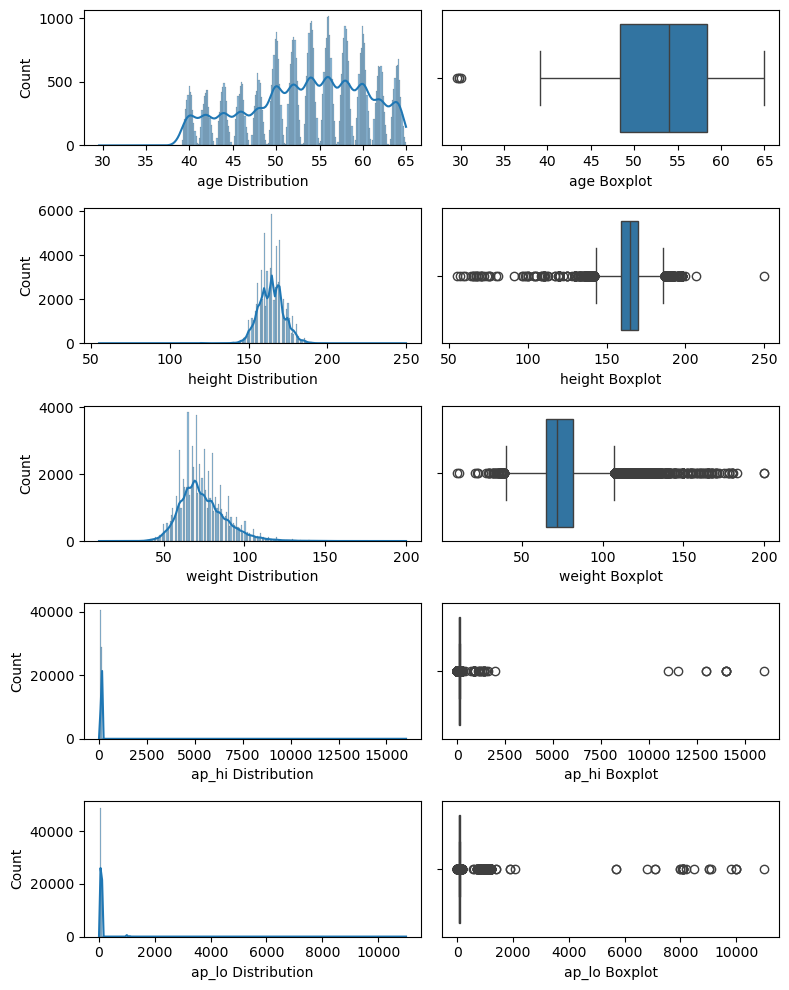

In [20]:
fig, ax =  plt.subplots(5, 2, figsize = (8, 10))
ax = ax.flatten()

num_graph = [i for i in range(ax.size) if i%2 == 0]
columns = ["age", "height", "weight", "ap_hi", "ap_lo"]
num_bins = int(np.sqrt(len(df_outliers)))

for idx, column in zip(num_graph, columns):
    sns.histplot(x = df_outliers[column], bins = num_bins, kde = True, ax = ax[idx])
    ax[idx].set_xlabel(column + ' Distribution')
    sns.boxplot(x = df_outliers[column], ax = ax[idx+1])
    ax[idx+1].set_xlabel(column + ' Boxplot')
    
plt.tight_layout()    
plt.show()

#### !¡!¡ Let's first address the outliers in the 'ap_hi' and 'ap_lo' columns, as they are the most significant. To do this, we will consider the following: <br>
The European Society of Cardiology divides blood pressure levels into three categories:

- Optimal: Systolic pressure less than 120 mmHg and diastolic pressure less than 80 mmHg.
- Normal: Systolic pressure between 120-129 mmHg and/or diastolic pressure between 80-84 mmHg.
- High-normal: Systolic pressure between 130/85 mmHg and/or diastolic pressure between 139/89 mmHg.

Based on these values, three grades of hypertension are defined:

- Grade 1 Hypertension: **Systolic pressure** 140-159 mmHg and/or **diastolic pressure** 90-99 mmHg.
- Grade 2 Hypertension: **Systolic pressure** 160-179 mmHg and/or **diastolic pressure** 100-109 mmHg.
- Grade 3 Hypertension: **Systolic pressure** greater than or equal to 180 mmHg and/or **diastolic pressure** greater than or equal to 110 mmHg.

In [21]:
def outliers(variable):
    '''
    Function to obtain the upper and lower limits after calculating the interquartile range.
    '''
    Q1 = variable.quantile(q = 0.25)
    Q3 = variable.quantile(q = 0.75)

    # Rango intercuartil (IQR)
    IQR = Q3 - Q1

    # Calcular los limites inferior y superior
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    return lim_inf, lim_sup

#### 1.2.1- "ap_hi" Column ( _1 ):

In [22]:
lim_inf_1, lim_sup_1 = outliers(df_outliers["ap_hi"])
print(f"Lower limit: {lim_inf_1}\nUpper limit: {lim_sup_1}")

Lower limit: 90.0
Upper limit: 170.0


Guided by the previously provided information, we define the maximum and minimum limits for systolic blood pressure as 210 and 90 mmHg, respectively:

In [23]:
percentage_outliers_ap_hi = len(df_outliers[(~df_outliers["ap_hi"].between(lim_inf_1, 210))])*100/len(df_outliers)
print(f"Percentage of outliers in the 'ap_hi' column: {round(percentage_outliers_ap_hi, 2)} %")

Percentage of outliers in the 'ap_hi' column: 0.55 %


Approaches:
- A. Removal of outliers (0.56%)
- B. We can define outliers as NaN's, so after cleaning the dataframe, we can impute them using KNNImputer.

#### *!¡!¡ In an attempt to avoid losing information in a relevant column, option B is chosen.*

#### 1.2.2- "ap_lo" Column ( _2 ):

In [24]:
lim_inf_2, lim_sup_2 = outliers(df_outliers["ap_lo"])
print(f"Lower limit: {lim_inf_2}\nUpper limit: {lim_sup_2}")

Lower limit: 65.0
Upper limit: 105.0


In this case, we define the maximum and minimum limits for diastolic blood pressure as 140 and 50 mmHg, respectively:

In [25]:
percentage_outliers_ap_lo = len(df_outliers[(~df_outliers["ap_lo"].between(50, 140))])*100/len(df_outliers)
print(f"Percentage of outliers in the 'ap_lo' column: {round(percentage_outliers_ap_lo,2)} %")

Percentage of outliers in the 'ap_lo' column: 1.52 %


#### Note that values start to spike after 190, likely due to annotation errors.<br>
Approaches:
- A. Removal of outliers (1.52%)
- B. We can define outliers as NaN's, so after cleaning the dataframe, we can impute them using KNNImputer.

#### *!¡!¡ In an attempt to avoid losing information in a relevant column, option B is chosen.*

#### 1.2.3- "height" Column ( _3 ):

In [26]:
lim_inf_3, lim_sup_3 = outliers(df_outliers["height"])
print(f"Lower limit: {lim_inf_3}\nUpper limit: {lim_sup_3}")

Lower limit: 142.5
Upper limit: 186.5


In [27]:
percentage_outliers_height = len(df_outliers[(~df_outliers["height"].between(lim_inf_3, 200))])*100/len(df_outliers)
print(f"Percentage of outliers in the 'height' column: {round(percentage_outliers_height,2)} %")

Percentage of outliers in the 'height' column: 0.36 %


In [28]:
df_outliers[df_outliers["height"] > 200].sort_values(by= "height", ascending=True)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
21628,30894,52.202740,2,207,78.0,100,70,1,1,0,1,1,0
6486,9223,58.136986,1,250,86.0,140,100,3,1,0,0,1,1


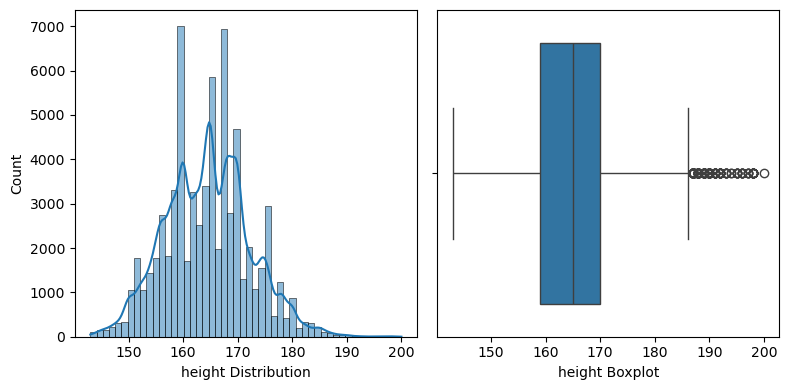

In [29]:
# Removing outliers:
column_3 = "height"

df_outliers = df_outliers[df_outliers[column_3].between(lim_inf_3, 200)]

# Plot:
fig, ax =  plt.subplots(1, 2, figsize = (8, 4))
ax = ax.flatten()

sns.histplot(x = df_outliers[column_3], bins = 50, kde = True, ax = ax[0])
ax[0].set_xlabel(column_3 + ' Distribution')
sns.boxplot(x = df_outliers[column_3], ax = ax[1])
ax[1].set_xlabel(column_3 + ' Boxplot')
    
plt.tight_layout()    
plt.show()

#### 1.2.4- "weight" Column ( _4 ): <br>

*!¡!¡ It's important to note that overweight is a risk factor for cardiovascular diseases. Therefore, high weights that are not considered anomalies (errors) will not be removed. However, weights below the lower limit will be removed.*

In [30]:
lim_inf_4, lim_sup_4 = outliers(df_outliers["weight"])
print(f"Lower limit: {lim_inf_4}\nUpper limit: {lim_sup_4}")

Lower limit: 39.5
Upper limit: 107.5


In [31]:
percentage_outliers_weight = len(df_outliers[(df_outliers["weight"] < lim_inf_4)])*100/len(df_outliers)
print(f"Percentage of outliers below 39.5 Kg in the 'weight' column: {round(percentage_outliers_weight,2)} %")

Percentage of outliers below 39.5 Kg in the 'weight' column: 0.06 %


In [32]:
df_outliers["weight"].describe()

count    69748.000000
mean        74.217507
std         14.341027
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [402]:
df_outliers[df_outliers["weight"] > 82]["cardio"].value_counts()

cardio
1    10586
0     6204
Name: count, dtype: int64

##### *It's observed that patients weighing more than 82 kg have a 62% higher likelihood of experiencing cardiovascular problems.*

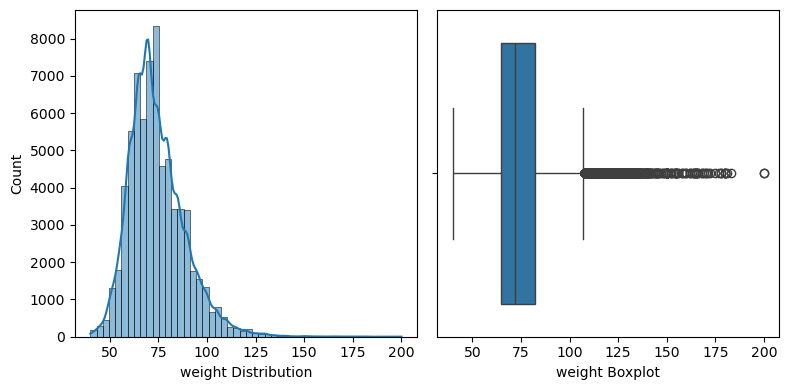

In [403]:
# Removing outliers:
column_4 = "weight"

df_outliers = df_outliers[df_outliers[column_4] > lim_inf_4]

# Grafico:
fig, ax =  plt.subplots(1, 2, figsize = (8, 4))
ax = ax.flatten()

sns.histplot(x = df_outliers[column_4], bins = 50, kde = True, ax = ax[0])
ax[0].set_xlabel(column_4 + ' Distribution')
sns.boxplot(x = df_outliers[column_4], ax = ax[1])
ax[1].set_xlabel(column_4 + ' Boxplot')
    
plt.tight_layout()    
plt.show()

## 1.3- Checking for class imbalance:

In [33]:
clases = df_outliers["cardio"].value_counts()
clases_dict = clases.to_dict()

In [34]:
no_cardio = clases_dict[0]*100/clases.values.sum()
cardio = clases_dict[1]*100/clases.values.sum()

print(f"Percentage of patients without cardiovascular problems: {round(no_cardio, 2)} % \nPercentage of patients with cardiovascular problems: {round(cardio, 2)} %")

Percentage of patients without cardiovascular problems: 50.04 % 
Percentage of patients with cardiovascular problems: 49.96 %


#### *There is no class imbalance.*

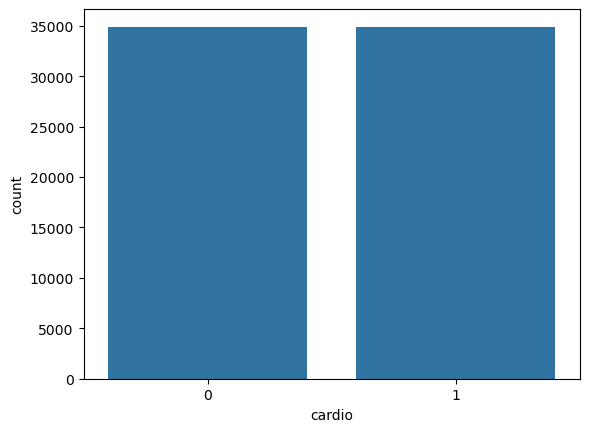

In [35]:
sns.barplot(clases);

## 1.4 Let's analyze the subjective columns:

In [407]:
df_outliers[["smoke", "alco", "active"]].head(3)

,smoke,alco,active
0,0,0,1
1,0,0,1
2,0,0,0


**Let's see if there are differences between people with healthy habits and those who have some type of unhealthy habit in relation to cardiovascular problems. If noticeable differences exist, we will keep these columns for further analysis.**<br>

- We define a healthy person as someone who does not smoke (0), does not drink (0), and is active (1).
- We define an unhealthy person as someone who has any unhealthy habit.

- Percentage of people with healthy habits:

In [408]:
healthy_mask = (df_outliers["smoke"] == 0) & (df_outliers["alco"] == 0) & (df_outliers["active"] == 1)
percentage_healthy = len(df_outliers[healthy_mask]) * 100 / len(df_outliers)
print(f"Percentage of healthy: {round(percentage_healthy)}%")

Percentage of healthy: 71%


In [409]:
total_cardio_healthy = df_outliers[healthy_mask]["cardio"].value_counts()
percentage_cardio_healthy = total_cardio_healthy[1]*100/total_cardio_healthy.sum()
print(f"Percentage of deseasse if healthy: {round(percentage_cardio_healthy)}%")

Percentage of deseasse if healthy: 49%


- Percentage of people with unhealthy habits:

In [410]:
no_healthy_mask = (df_outliers["smoke"] == 1) | (df_outliers["alco"] == 1) | (df_outliers["active"] == 0)
percentage_no_healthy = len(df_outliers[no_healthy_mask]) * 100 / len(df_outliers)
print(f"Percentage of no healthy: {round(percentage_no_healthy)}%")

Percentage of no healthy: 29%


In [411]:
total_cardio_no_healthy = df_outliers[no_healthy_mask]["cardio"].value_counts()
percentage_cardio_no_healthy = total_cardio_no_healthy[1]*100/total_cardio_no_healthy.sum()
print(f"Percentage of deseasse if no healthy: {round(percentage_cardio_no_healthy)}%")

Percentage of deseasse if no healthy: 52%


- *We can observe that people with healthy habits have a lower percentage of cardiovascular problems, although the difference is not significant compared to those with some type of unhealthy habit.*

*As there is a small difference between habits, we will consider the subjective columns for this analysis, as they may contribute predictive information.*

# 2- Data Preprocessing

In [412]:
df_preprocess = df_outliers.copy()

In [413]:
df_preprocess.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1


In [414]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69703 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69703 non-null  int64  
 1   age          69703 non-null  float64
 2   gender       69703 non-null  int64  
 3   height       69703 non-null  int64  
 4   weight       69703 non-null  float64
 5   ap_hi        69703 non-null  int64  
 6   ap_lo        69703 non-null  int64  
 7   cholesterol  69703 non-null  int64  
 8   gluc         69703 non-null  int64  
 9   smoke        69703 non-null  int64  
 10  alco         69703 non-null  int64  
 11  active       69703 non-null  int64  
 12  cardio       69703 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


## 2.1- OneHot encoding:

In [415]:
gender_dic = {x : num for num, x in enumerate(df_preprocess["gender"].unique())}

df_preprocess["gender"] = df_preprocess["gender"].map(gender_dic)

## 2.2- Label encoding:

- "cholesterol" Column:

In [416]:
cholesterol_label_encoder = LabelEncoder()

cholesterol = cholesterol_label_encoder.fit_transform(df_preprocess["cholesterol"])

df_preprocess["cholesterol"] = cholesterol

- "gluc" Column:

In [417]:
gluc_label_encoder = LabelEncoder()

gluc = gluc_label_encoder.fit_transform(df_clean["gluc"])

df_clean["gluc"] = gluc

In [418]:
df_preprocess.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,0,168,62.0,110,80,0,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,2,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,2,1,0,0,0,1


## 2.3- Converting the values in the 'height' column to the International System of Units:<br>
- Height to meters

In [419]:
def to_meter(x):
    x_meter = x/100
    return x_meter

In [420]:
df_preprocess["height"] = df_preprocess["height"].apply(to_meter)

In [421]:
df_preprocess.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,0,1.68,62.0,110,80,0,1,0,0,1,0
1,1,55.419178,1,1.56,85.0,140,90,2,1,0,0,1,1
2,2,51.663014,1,1.65,64.0,130,70,2,1,0,0,0,1


## 2.4- Creation of new variables:

- Body Mass Index:

In [422]:
df_preprocess["IMC"] = df_preprocess["weight"] / (df_preprocess["height"])**2

In [423]:
df_preprocess.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,0,50.391781,0,1.68,62.0,110,80,0,1,0,0,1,0,21.967120
1,1,55.419178,1,1.56,85.0,140,90,2,1,0,0,1,1,34.927679
2,2,51.663014,1,1.65,64.0,130,70,2,1,0,0,0,1,23.507805


## 2.5- Data type transformation:

In [424]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69703 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69703 non-null  int64  
 1   age          69703 non-null  float64
 2   gender       69703 non-null  int64  
 3   height       69703 non-null  float64
 4   weight       69703 non-null  float64
 5   ap_hi        69703 non-null  int64  
 6   ap_lo        69703 non-null  int64  
 7   cholesterol  69703 non-null  int64  
 8   gluc         69703 non-null  int64  
 9   smoke        69703 non-null  int64  
 10  alco         69703 non-null  int64  
 11  active       69703 non-null  int64  
 12  cardio       69703 non-null  int64  
 13  IMC          69703 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 8.0 MB


In [425]:
cols_to_int = ["gender", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]

for col in cols_to_int:
    df_preprocess[col] = df_preprocess[col].astype("int")

In [426]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69703 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69703 non-null  int64  
 1   age          69703 non-null  float64
 2   gender       69703 non-null  int32  
 3   height       69703 non-null  float64
 4   weight       69703 non-null  float64
 5   ap_hi        69703 non-null  int32  
 6   ap_lo        69703 non-null  int32  
 7   cholesterol  69703 non-null  int32  
 8   gluc         69703 non-null  int32  
 9   smoke        69703 non-null  int32  
 10  alco         69703 non-null  int32  
 11  active       69703 non-null  int32  
 12  cardio       69703 non-null  int32  
 13  IMC          69703 non-null  float64
dtypes: float64(4), int32(9), int64(1)
memory usage: 5.6 MB


## 2.6 Correlation analysis:

C:\Users\regue\conda_ENV\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


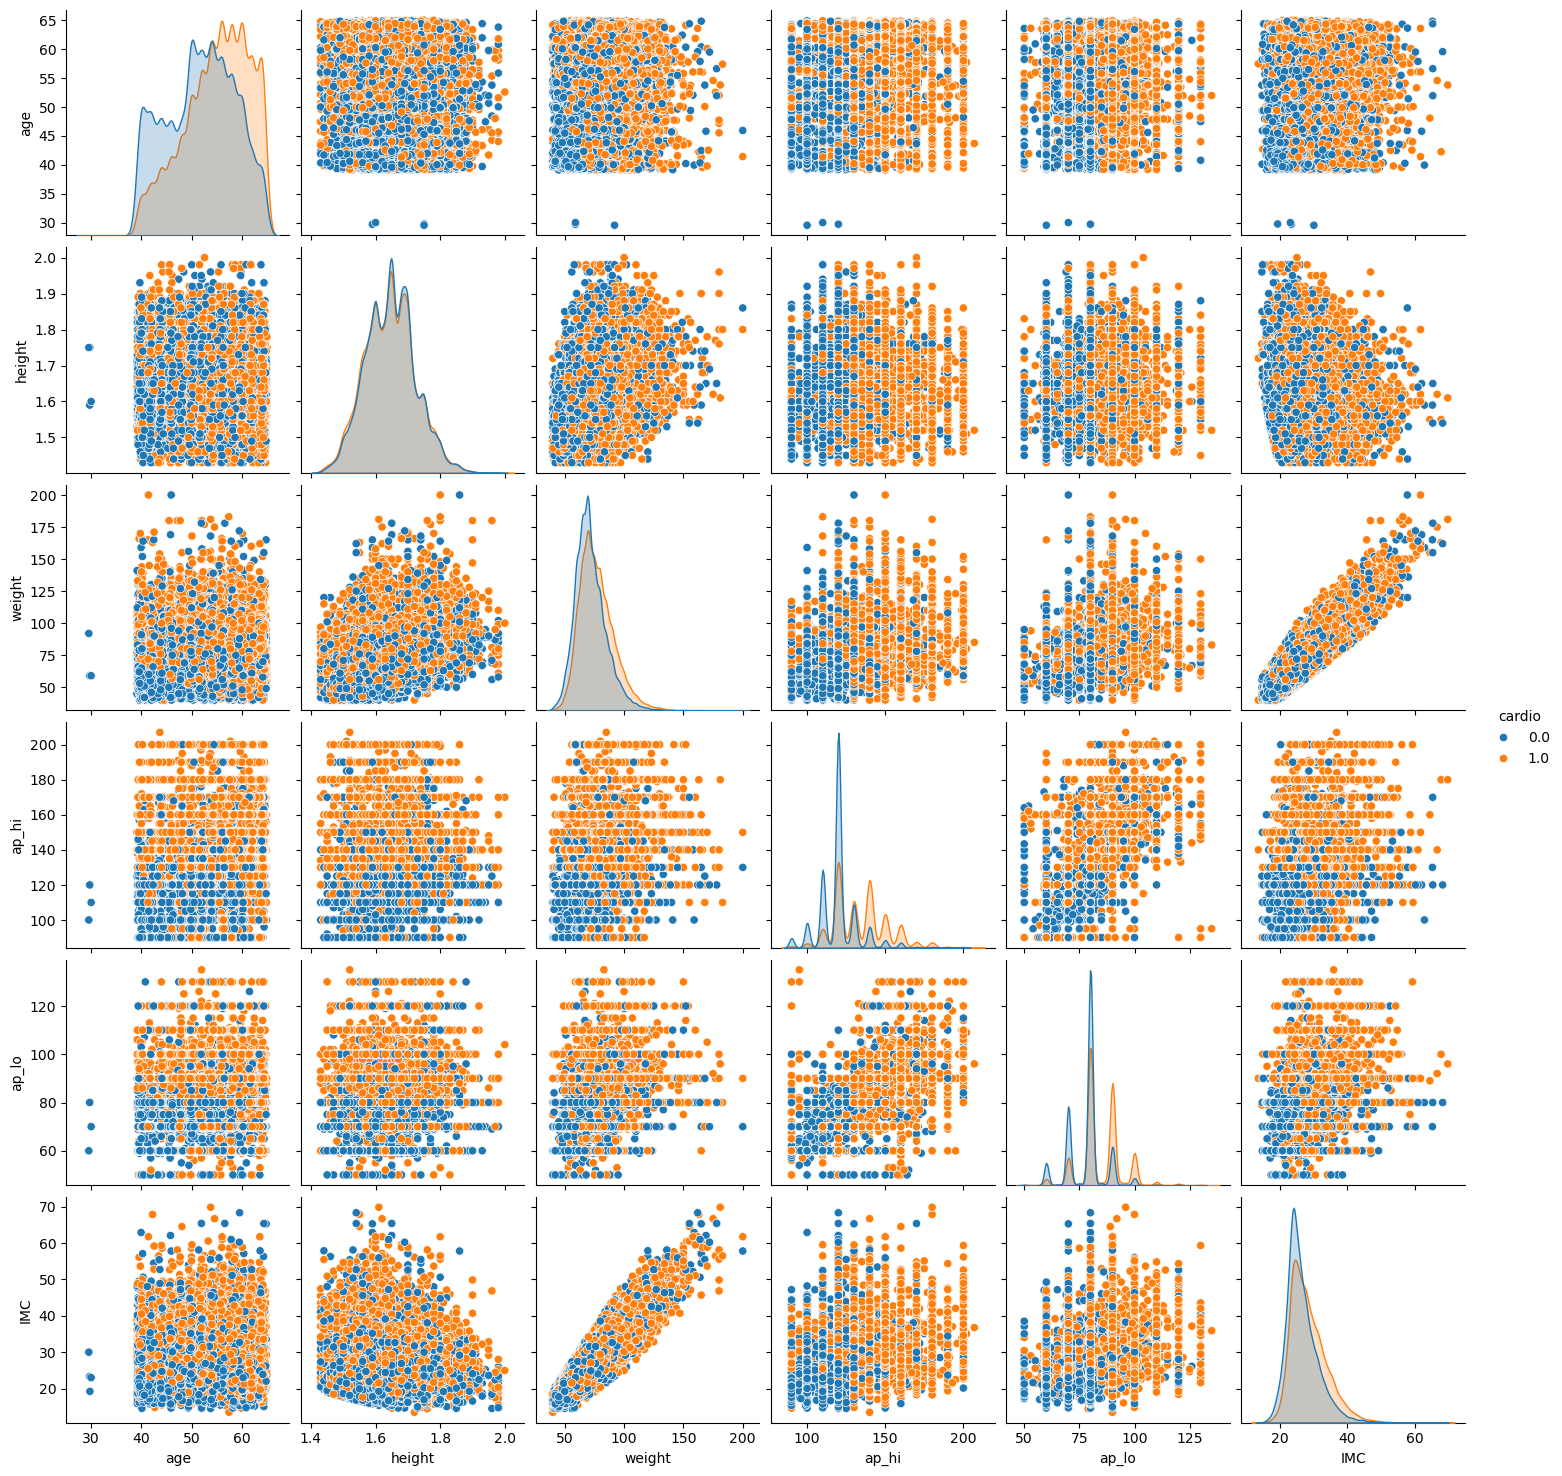

In [369]:
sns.pairplot(data = df_preprocess, vars=["age", "height", "weight", "ap_hi", "ap_lo", "IMC"], hue = "cardio");

**"The height column DOES NOT seem to show a correlation with cardiovascular problems, so we will remove it.**

## 2.7- Column deletion:

In [427]:
df_preprocess = df_preprocess.drop(["id", "height"], axis= 1)

In [428]:
df_preprocess.head(3)

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50.391781,0,62.0,110,80,0,1,0,0,1,0,21.967120
1,55.419178,1,85.0,140,90,2,1,0,0,1,1,34.927679
2,51.663014,1,64.0,130,70,2,1,0,0,0,1,23.507805


## 2.8- Imputing values for the 'ap_hi' and 'ap_lo' columns (Option B - Section 1.2.1 and 1.2.2):<br>
I'll convert the values of systolic and diastolic blood pressure to NaN and then impute them using the KNNImputer.
- For systolic blood pressure ('ap_hi'), values outside the range of 90 to 210 mmHg will be converted to NaN.
- For diastolic blood pressure ('ap_lo'), values outside the range of 50 to 140 mmHg will be converted to NaN.

In [429]:
limite_sup_SI_ap_hi = 210
limite_inf_SI_ap_hi = 90

percentage_outliers_ap_hi = len(df_preprocess[(~df_preprocess["ap_hi"].between(limite_inf_SI_ap_hi, limite_sup_SI_ap_hi))])*100/len(df_preprocess)
print(f"Percentage of outliers in the 'ap_hi' column: {round(percentage_outliers_ap_hi,2)} %")

Percentage of outliers in the 'ap_hi' column: 0.55 %


In [430]:
limite_sup_SI_ap_lo = 140
limite_inf_SI_ap_lo = 50

percentage_outliers_ap_lo = len(df_preprocess[(~df_preprocess["ap_lo"].between(limite_inf_SI_ap_lo, limite_sup_SI_ap_lo))])*100/len(df_preprocess)
print(f"Percentage of outliers in the 'ap_lo' column: {round(percentage_outliers_ap_lo,2)} %")

Percentage of outliers in the 'ap_lo' column: 1.51 %


In [431]:
# Defining NaN:
df_preprocess["ap_hi"] = df_preprocess["ap_hi"].apply(lambda x: np.nan if not (limite_inf_SI_ap_hi <= x < limite_sup_SI_ap_hi) else x)
df_preprocess["ap_lo"] = df_preprocess["ap_lo"].apply(lambda x: np.nan if not (limite_inf_SI_ap_lo <= x < limite_sup_SI_ap_lo) else x)

In [432]:
df_preprocess[["ap_hi", "ap_lo"]].isna().sum()

ap_hi     409
ap_lo    1087
dtype: int64

In [433]:
presion_imputer = KNNImputer()
df_preprocess = pd.DataFrame(data = presion_imputer.fit_transform(df_preprocess), columns = df_preprocess.columns)
df_preprocess.head(3)

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50.391781,0.0,62.0,110.0,80.0,0.0,1.0,0.0,0.0,1.0,0.0,21.967120
1,55.419178,1.0,85.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0,34.927679
2,51.663014,1.0,64.0,130.0,70.0,2.0,1.0,0.0,0.0,0.0,1.0,23.507805


In [434]:
df_preprocess[["ap_hi", "ap_lo"]].isna().sum()

ap_hi    0
ap_lo    0
dtype: int64

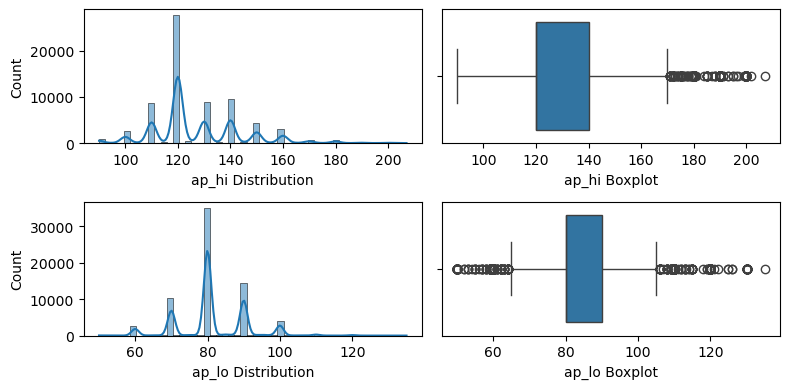

In [435]:
# Plot:
column_1= "ap_hi"
column_2= "ap_lo"

fig, ax =  plt.subplots(2, 2, figsize = (8, 4))
ax = ax.flatten()

# Systolic blood pressure:
sns.histplot(x = df_preprocess[column_1], bins = 50, kde = True, ax = ax[0])
ax[0].set_xlabel(column_1 + ' Distribution')
sns.boxplot(x = df_preprocess[column_1], ax = ax[1])
ax[1].set_xlabel(column_1 + ' Boxplot')

# Diastolic blood pressure:
sns.histplot(x = df_preprocess[column_2], bins = 50, kde = True, ax = ax[2])
ax[2].set_xlabel(column_2 + ' Distribution')
sns.boxplot(x = df_preprocess[column_2], ax = ax[3])
ax[3].set_xlabel(column_2 + ' Boxplot')
    
plt.tight_layout()    
plt.show()

## 2.8- Feature Selection

In [436]:
df_processed = df_preprocess.copy()

In [437]:
# df_processed.to_csv("cardio_data_processed_final.csv", index= False, sep= ",")

In [438]:
df_processed = pd.read_csv("cardio_data_processed_final.csv")

In [439]:
df_processed.head(3)

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50.391781,0.0,62.0,110.0,80.0,0.0,1.0,0.0,0.0,1.0,0.0,21.967120
1,55.419178,1.0,85.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0,34.927679
2,51.663014,1.0,64.0,130.0,70.0,2.0,1.0,0.0,0.0,0.0,1.0,23.507805


In [440]:
df_processed = df_processed.sample(frac=1, random_state=42)

X = df_processed.drop(["cardio"], axis = 1)
y = df_processed["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state = 42)

# Scale:
scaler_x = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# 3- Training models:

In [441]:
models = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), NearestCentroid(), RandomForestClassifier(), SVC(), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), HistGradientBoostingClassifier()]

In [ ]:
%%time

resultados = []

for model in models:
        
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metricas:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    resultados.append([str(model), accuracy, precision, recall])
    
df_resultados = pd.DataFrame(resultados, columns= ["Modelo", "Accuracy", "Precision", "Recall"])

In [443]:
df_resultados.sort_values(by="Accuracy", ascending=False)

,Modelo,Accuracy,Precision,Recall
7,GradientBoostingClassifier(),0.743993,0.764276,0.705139
9,HistGradientBoostingClassifier(),0.743275,0.759222,0.712030
5,SVC(),0.742630,0.773124,0.686334
6,AdaBoostClassifier(),0.740119,0.780972,0.666954
8,"XGBClassifier(base_score=None, booster=None, c...",0.739258,0.759788,0.699254
0,LogisticRegression(),0.736102,0.764867,0.681309
3,NearestCentroid(),0.722186,0.747559,0.670399
4,RandomForestClassifier(),0.719963,0.725346,0.707436
1,GaussianNB(),0.710925,0.757544,0.619868
2,KNeighborsClassifier(),0.700739,0.702288,0.696239


## 3.1- Hyperparametrization:

### 3.1.1- Gradient Boosting Classifier

In [576]:
model_GBC = GradientBoostingClassifier()

parameters_GBC = {"learning_rate"          : [0.09], # Probar > 0.08
                  "loss"                   : ['log_loss'],
                  "n_estimators"           : [250],
                  "subsample"              : [1],
                  "min_impurity_decrease"  : [0.05],
                  "max_depth"              : [3]}
                  #"max_features"           : [None],
                  #"min_samples_leaf"       : [1],
                  #"min_samples_split"      : [3]} 

In [ ]:
%%time

resultados_GBC = []

grid_solver_GBC = GridSearchCV(estimator      = model_GBC, 
                               param_grid     = parameters_GBC,
                               scoring        = "accuracy",
                               refit          = "accuracy",
                               cv             = 5,
                               n_jobs         = -1,
                               verbose        = 2)
    
model_result_GBC = grid_solver_GBC.fit(X_train_scaled, y_train)


y_pred = model_result_GBC.best_estimator_.predict(X_test_scaled)

params_GBC = model_result_GBC.best_estimator_.get_params()

# Metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

resultados_GBC.append([str(model_GBC), accuracy, precision, recall, params_GBC])
resultados.append([str(model_GBC), accuracy, precision, recall, params_GBC])

df_resultados_GBC = pd.DataFrame(resultados_GBC, columns= ["Modelo", "Accuracy", "Precision", "Recall", "Parameters"])

In [ ]:
#####################################################################################################################

### 3.1.2- Random Forest Classifier

In [89]:
model_RFC = RandomForestClassifier()

parameters_RFC = {"n_estimators"           : [50, 100, 200],
                  "criterion"              : ["gini", "entropy"],
                  "max_depth"              : [3, 4, 5],
                  "max_features"           : [2, 3],
                  "max_leaf_nodes"         : [None, 8],
                  "min_impurity_decrease"  : [0, 0.02, 0.3],
                  "min_samples_split"      : [2, 3, 5]}

In [ ]:
%%time

resultados_RFC = []

grid_solver_RFC = GridSearchCV(estimator      = model_RFC, 
                               param_grid     = parameters_RFC, 
                               scoring        = "accuracy",
                               cv             = 5,
                               verbose        = 2,
                               refit          = "accuracy",
                               n_jobs         = None)

model_result_RFC = grid_solver_RFC.fit(X_train_scaled, y_train)


y_pred = model_result_RFC.best_estimator_.predict(X_test_scaled)

params_RFC = model_result_RFC.best_estimator_.get_params()

# Metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

resultados_RFC.append([str(model_RFC), accuracy, precision, recall, params_RFC])
resultados.append([str(model_RFC), accuracy, precision, recall, params_RFC])

df_resultados_RFC = pd.DataFrame(resultados_RFC, columns= ["Modelo", "Accuracy", "Precision", "Recall", "Parameters"])

In [ ]:
#####################################################################################################################

### 3.1.3- Hist Gradient Boosting Classifier

In [525]:
model_HGBC = HistGradientBoostingClassifier()

parameters_HGBC = {"learning_rate"       : [0.05],
                  "max_iter"             : [100,200,10],
                  "max_leaf_nodes"       : [24],
                  "max_depth"            : [None],
                  "min_samples_leaf"     : [16]}

In [ ]:
%%time

resultados_HGBC = []

grid_solver_HGBC = GridSearchCV(estimator      = model_HGBC, 
                                param_grid     = parameters_HGBC,
                                scoring        = "accuracy",
                                refit          = "accuracy",
                                cv             = 5,
                                n_jobs         = -1,
                                verbose        = 2)
    
model_result_HGBC = grid_solver_HGBC.fit(X_train_scaled, y_train)


y_pred = model_result_HGBC.best_estimator_.predict(X_test_scaled)

params_HGBC = model_result_HGBC.best_estimator_.get_params()

# Metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

resultados_HGBC.append([str(model_HGBC), accuracy, precision, recall, params_HGBC])
resultados.append([str(model_HGBC), accuracy, precision, recall, params_HGBC])

df_resultados_HGBC = pd.DataFrame(resultados_HGBC, columns= ["Modelo", "Accuracy", "Precision", "Recall", "Parameters"])

In [ ]:
#####################################################################################################################

### 3.1.4- XGB Classifier

In [514]:
model_XGB = XGBClassifier(objective='binary:logistic',
                          eval_metric='aucpr',
                          tree_method='hist',
                          use_label_encoder=False)

parameters_XGB = {'n_estimators'      : [100,150,200],
                  'learning_rate'     : [i/100 for i in range(1,10)],
                  "booster"           : ["gbtree"],
                  "grow_policy"       : ["depthwise", "lossguide"]}

In [ ]:
resultados_XGB = []

grid_solver_XGB = GridSearchCV(estimator      = model_XGB, 
                               param_grid     = parameters_XGB,
                               scoring        = "accuracy",
                               refit          = "accuracy",
                               cv             = 5,
                               n_jobs         = -1,
                               verbose        = 2)
    
model_result_XGB = grid_solver_XGB.fit(X_train_scaled, y_train)


y_pred = model_result_XGB.best_estimator_.predict(X_test_scaled)

params_XGB = model_result_XGB.best_estimator_.get_params()

# Metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

resultados_XGB.append([str(model_XGB), accuracy, precision, recall, params_XGB])
resultados.append([str(model_XGB), accuracy, precision, recall, params_XGB])

df_resultados_XGB = pd.DataFrame(resultados_XGB, columns= ["Modelo", "Accuracy", "Precision", "Recall", "Parameters"])

In [ ]:
#####################################################################################################################

### 3.1.5- Suport Vector Machine

In [509]:
model_SVC = SVC(probability=True)

parameters_SVC = {'C'          : [1],
                  'kernel'     : ['rbf'],
                  'gamma'      : ['scale'],
                  "degree"     : [3, 4]}

In [ ]:
%%time

resultados_SVC = []

grid_solver_SVC = GridSearchCV(estimator      = model_SVC, 
                               param_grid     = parameters_SVC,
                               scoring        = "accuracy",
                               refit          = "accuracy",
                               cv             = 5,
                               n_jobs         = -1,
                               verbose        = 2)
    
model_result_SVC = grid_solver_SVC.fit(X_train_scaled, y_train)


y_pred = model_result_SVC.best_estimator_.predict(X_test_scaled)

params_SVC = model_result_SVC.best_estimator_.get_params()

# Metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

resultados_SVC.append([str(model_SVC), accuracy, precision, recall, params_SVC])
resultados.append([str(model_SVC), accuracy, precision, recall, params_SVC])

df_resultados_SVC = pd.DataFrame(resultados_SVC, columns= ["Modelo", "Accuracy", "Precision", "Recall", "Parameters"])

In [ ]:
#####################################################################################################################

# 4- Final results

In [531]:
df_resultados = pd.DataFrame(resultados, columns= ["Modelo", "Accuracy", "Precision", "Recall", "Parameters"])

In [532]:
# df_resultados.to_csv("resultados_finales_cardio.csv", index= False, sep= ",")

In [621]:
df_resultados.sort_values(by= "Accuracy", ascending= False)

,Modelo,Accuracy,Precision,Recall,Parameters
20,GradientBoostingClassifier(),0.746144,0.766361,0.707723,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
14,GradientBoostingClassifier(),0.746144,0.766361,0.707723,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
17,GradientBoostingClassifier(),0.746073,0.766242,0.707723,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
16,GradientBoostingClassifier(),0.746073,0.766242,0.707723,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
15,GradientBoostingClassifier(),0.746073,0.766242,0.707723,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
18,GradientBoostingClassifier(),0.746073,0.766325,0.707580,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
19,GradientBoostingClassifier(),0.746001,0.766206,0.707580,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
13,GradientBoostingClassifier(),0.745069,0.765815,0.705570,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
11,GradientBoostingClassifier(),0.744495,0.765523,0.704421,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
12,GradientBoostingClassifier(),0.744495,0.765523,0.704421,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."


### 4.1- Gradient Boosting Classifier - Best performance:

In [620]:
GBC = GradientBoostingClassifier()

param_GBC = {"learning_rate"          : [0.09],
             "loss"                   : ['log_loss'],
             "n_estimators"           : [250],
             "subsample"              : [1],
             "min_impurity_decrease"  : [0.05],
             "max_depth"              : [3]}

GS_GBC = GridSearchCV(estimator      = GBC, 
                      param_grid     = param_GBC,
                      scoring        = "accuracy",
                      refit          = "accuracy",
                      cv             = 5,
                      n_jobs         = -1,
                      verbose        = 0)
    
best_results_GBC = GS_GBC.fit(X_train_scaled, y_train)

# filename = 'final_model.sav'
# pickle.dump(model, open(filename, 'wb'))

y_pred = best_results_GBC.best_estimator_.predict(X_test_scaled)

best_parameters = best_results_GBC.best_estimator_.get_params()

# Metricas:
print(f"Precision = {precision_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred)}")
print(f"Final model Accuracy = {accuracy_score(y_test, y_pred)}")

Precision = 0.766241840223811
Recall = 0.7077232271030721
Final model Accuracy = 0.7460727350979126


In [619]:
dumb_acc = df_processed["cardio"].sum() / len(df_processed)
print(f"Dumb model Accuracy = {dumb_acc}")

Dumb model Accuracy = 0.49966285525730597


In [ ]:
total = Counter(y_test)
print(f"Healthy individuals: {total[0]}\nUnhealthy individuals.: {total[1]}")

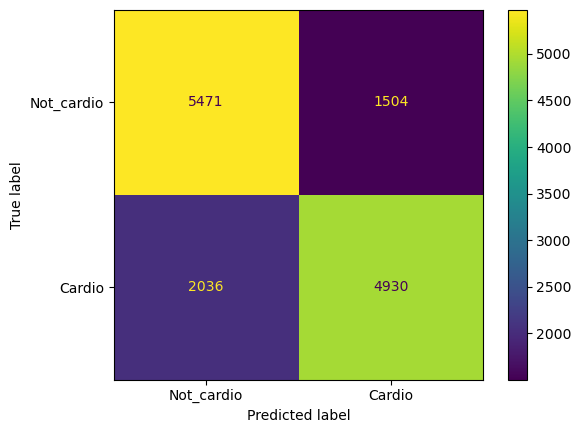

In [603]:
labels = ["Not_cardio", "Cardio"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= labels)
disp.plot()
plt.show()

# 5-Conclusion

*<h4>After experimenting with hyperparameter tuning across various models, we achieved an accuracy of 74.6% with the GradientBoostingClassifier. Considering that the baseline model yields an accuracy of 49.9%, our model has demonstrated a significant improvement in predicting cardiovascular problems. However, further enhancements would be needed to achieve a higher accuracy or, at the very least, a higher recall at the expense of precision.*